# STAT207 Final Project - Predictive Analysis on Obesity


Idunnuoluwa Akinola, Zach Goldstein, Anh Do

## 1. Introduction

According to the WHO, "Rates of overweight and obesity continue to grow in adults and children. From 1975 to 2016, the prevalence of overweight or obese children and adolescents aged 5–19 years increased more than four-fold from 4% to 18% globally" (WHO, 2020). The prevalence of obesity is the result of certain factors which include lifestyle, diet, physical activties and broader environment (Mayo Clinic, 2023). Changes in work, transportation, and leisure activities have led to more sedentary lifestyles. Desk jobs, reliance on cars, and increased screen time contribute to a lack of physical activity. Some individuals may have a genetic predisposition to obesity, making it more challenging for them to maintain a healthy weight. A model that predicts whether a person may be at risk for obesity for new datasets would help those affected seek preventative treatment.

We are going to explore a dataset about certain factors that contribute to obesity. The goal of exploring this dataset is to create a predictive model that will predict family history with obesity for new datasets using:
* Weight
* Frequency of consumption of vegetables (FCVC)
* Physical activity frequency (FAF)
* Number of main meals (NCP), and
* Frequent consumption of high caloric food (FAVC)

Scientist, nutritionist, doctors and individuals will find this model very useful because it will help them pinpoint common causes of obesity and come up with more effective treatments and preventataive measures. These groups would prefer a classifier that is equally good at classifying positives and negatives because poor performance for either could cause undetected health conditions or medical overtreatment. We would also like our chosen model to provide reliable interpretative insights about the nature of the relationship between the variables in the dataset.

## 2. Dataset Discussion

The data consists of the estimation of obesity levels in people from Mexico, Peru and Colombia, with ages between 14 and 61 and diverse eating habits and physical conditions - each row represents data collected from one person. The data was collected through a web survey where anonymous users answered questions relating to attributes like Frequency of consumption of vegetables (FCVC), Number of main meals (NCP), and Physical activity frequency (FAF). The dataset is not inclusive of all possible types of observations since data was only collected from one region of the world which may have specific eating habits not reflected elsewhere, leaving out populations from other continents. The dataset was downloaded on 12/04/23 from Kaggle (https://www.kaggle.com/datasets/aravindpcoder/obesity-or-cvd-risk-classifyregressorcluster/data). Since only one population is represented, the people in our research motivation will have to conduct more research or adjust for their own demographic before drawing conclusions from model predictions. 

We will use family_history_with_overweight, which indicates whether the responder has/had a family member who suffers/suffered from overweight, which is correlated with obesity risk, as our response variable and the following explanatory variables:
* **Weight**: weight of the person surveighed in kilograms
* **Frequency of consumption of vegetables (FCVC)**: number of vegetables consumed per day
* **Physical activity frequency (FAF)**: number of times per week person engages in physical activity
* **Number of main meals (NCP)**: number of main meals eaten per day
* **Frequent consumption of high caloric food (FAVC)**: whether the person frequently consumes high caloric food (yes/no)

We chose to focus on these explanatory variables as they relate to diet quality and physical condition, which are very relevant to obesity.

In [364]:
#Run this
import pandas as pd                    # imports pandas and calls the imported version 'pd'
import matplotlib.pyplot as plt        # imports the package and calls it 'plt'
import seaborn as sns                  # imports the seaborn package with the imported name 'sns'
sns.set()  

In [365]:
original_df=df=pd.read_csv("ObesityDataSet.csv")
df.head(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [366]:
original_row_num=df.shape[0]
print("Rows before data cleaning: " + str(original_row_num))

Rows before data cleaning: 2111


In [367]:
df.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

## 3. Dataset Cleaning

We only intend to use family history with overweight, Frequency of consumption of vegetables (FCVC), Physical activity frequency (FAF), Number of main meals (NCP), weight and Frequent consumption of high caloric food (FAVC). After looking at the dataset with the selected variables that we desire to use, we can say that the dataset does not have any implicit missing values as all data types are consistent and neither binary variables contain a third value. Therefore, we didn't need to drop any rows. Our categorical explanatory variable has enough observations for every level, so we didn't drop any rows. 

We did detect outliers in our scatterplots and confirmed them using the outlier formula. The main pro of dropping these outliers is reducing data skewing due to extreme values, and the main con is losing potentially meaninful data points. Because there was a large number of outliers and we wanted to keep as much meaningful data as possible, we did not drop the outliers. Our number of rows remains the same.

We did not discover any other data cleaning ideas that would improve the answer to our research question.

In [368]:
# constants for easy access to variables
NUMERICAL_VARS = ['FCVC', 'NCP', 'FAF', 'Weight']
CATEGORICAL_VAR = 'FAVC'
RESPONSE_VAR = 'family_history_with_overweight'

In [369]:
# filter columns
df = df[[RESPONSE_VAR] + [CATEGORICAL_VAR] + NUMERICAL_VARS]
df

,family_history_with_overweight,FAVC,FCVC,NCP,FAF,Weight
0,yes,no,2.0,3.0,0.000000,64.000000
1,yes,no,3.0,3.0,3.000000,56.000000
2,yes,no,2.0,3.0,2.000000,77.000000
3,no,no,3.0,3.0,2.000000,87.000000
4,no,no,2.0,1.0,0.000000,89.800000
...,...,...,...,...,...,...
2106,yes,yes,3.0,3.0,1.676269,131.408528
2107,yes,yes,3.0,3.0,1.341390,133.742943
2108,yes,yes,3.0,3.0,1.414209,133.689352
2109,yes,yes,3.0,3.0,1.139107,133.346641


**Missing value detection**

In [370]:
# all datatypes are consistent with the datatype that values are supposed to be
df.dtypes

family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
FAF                               float64
Weight                            float64
dtype: object

In [371]:
df['family_history_with_overweight'].unique()

array(['yes', 'no'], dtype=object)

In [372]:
df['FAVC'].unique()

array(['no', 'yes'], dtype=object)

**Sample size cleaning**

In [373]:
# categorical explanatory variable has large number of observations for every value
print(df[df['FAVC'] == 'yes'].shape[0])
print(df[df['FAVC'] == 'no'].shape[0])

1866
245


**Outlier cleaning**

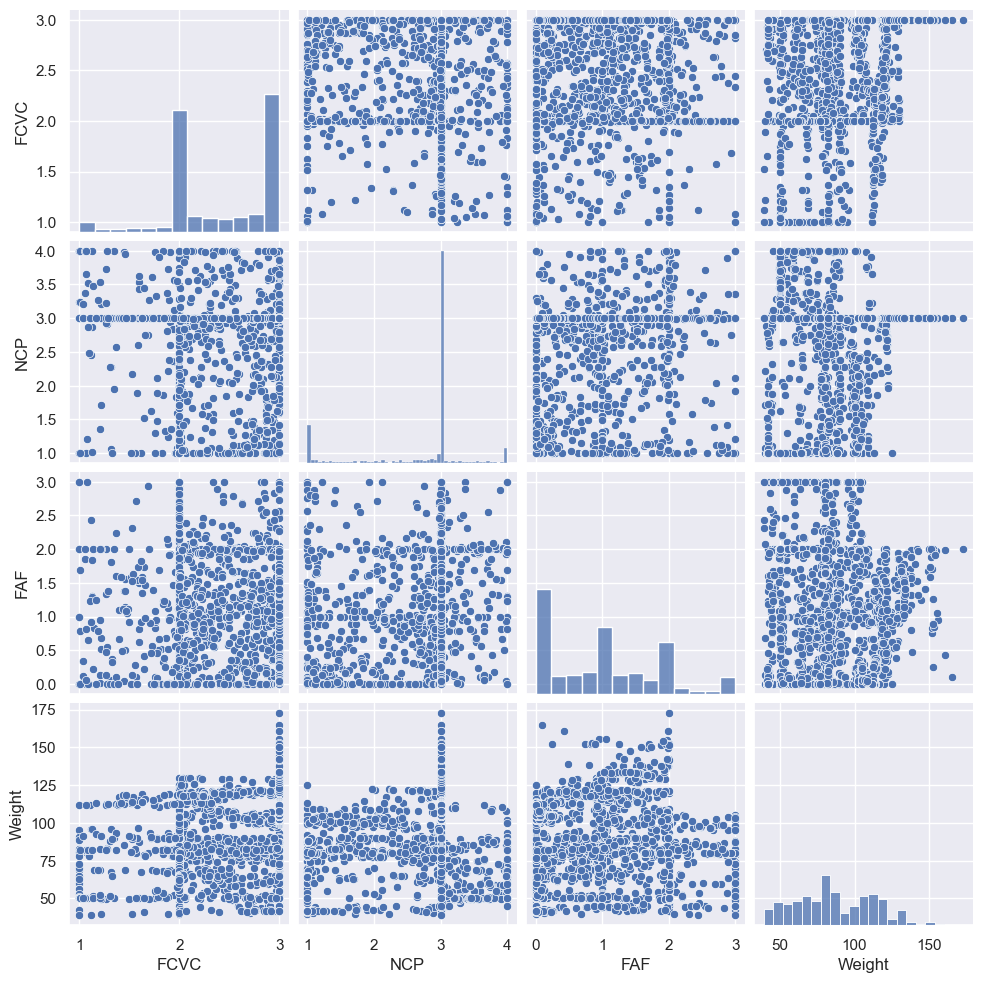

In [374]:
sns.pairplot(df)

In [375]:
# finding outliers using formula
outliers = set()
for variable in NUMERICAL_VARS:
    q1, q3 = df[variable].quantile(0.25), df[variable].quantile(0.75)
    iqr = q3 - q1
    outliers.update(set(df[(df[variable] > q3 + 1.5 * iqr) | (df[variable] < q1 - 1.5 * iqr)].index))
df.iloc[list(outliers)]

,family_history_with_overweight,FAVC,FCVC,NCP,FAF,Weight
4,no,no,2.000000,1.000000,0.000000,89.800000
14,yes,yes,3.000000,1.000000,1.000000,60.000000
16,yes,yes,2.000000,1.000000,1.000000,102.000000
17,no,yes,2.000000,1.000000,0.000000,78.000000
18,yes,yes,3.000000,4.000000,0.000000,82.000000
...,...,...,...,...,...,...
1794,yes,yes,2.919526,2.142328,0.958555,102.583895
1795,yes,yes,2.724121,1.437959,0.029603,105.580491
1796,yes,yes,2.801992,1.343117,0.233987,101.067988
1797,yes,yes,2.748971,1.213431,0.128548,104.321463


## 4. Preliminary Analysis

**Relationships between response and explanatory variables**

FAVC (Frequent consumption of high caloric food), NCP (Number of main meals) and Weight have strong relationships with the response variable with Weight being the strongest. There is little overlap for Weight and NCP, and the greatest difference in bar height for FAVC.

FCVC (Frequent consumption of vegetables) and FAF (Physical activity frequency) have weak relationships with the response variables with FCVC being the weakest. There is a lot of overlap between the side-by-side boxplots for both.

**Relationships between explanatory variable pairs**

FAVC and Weight have somewhat of a strong association as there is not much overlap between the boxplots.

**Interaction effects**
There is a strong interaction between FAVC and FCVC - grouping by FAVC changes the direction of the line, some between FAVC and NCP and Weight - the direction stays the same but the slope changes, and almost none between FAVC and FAF - both direction and slope remain the same.

----

**Relationships between response and explanatory variables**

Text(0.5, 1.0, 'Relationship between FAVC and Family History with Overweight')

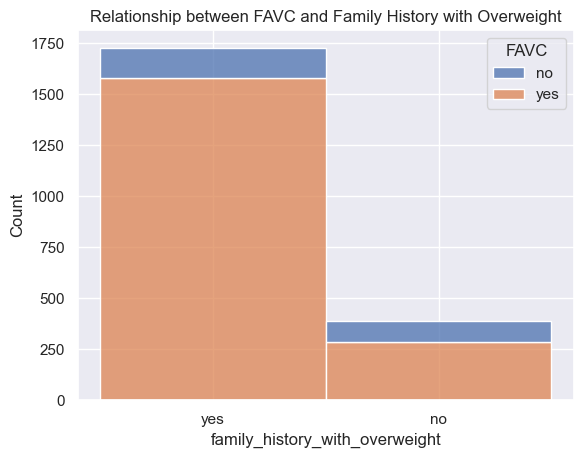

In [376]:
# FAVC - Frequent consumption of high caloric food
sns.histplot(data=df, x=RESPONSE_VAR, hue=CATEGORICAL_VAR, stat="count", multiple="stack").set_title("Relationship between FAVC and Family History with Overweight")

Text(0.5, 1.0, 'Relationship between FCVC and Family History with Overweight')

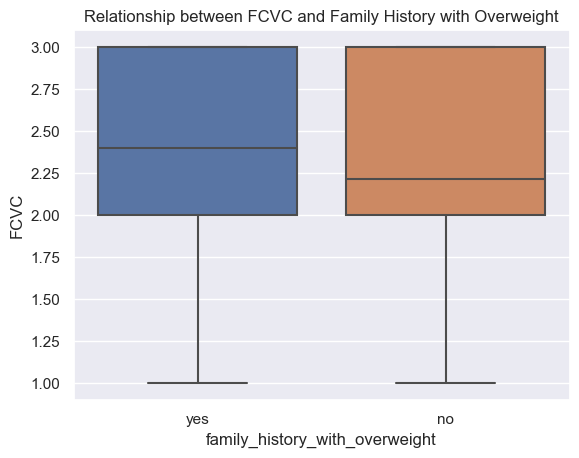

In [377]:
# FCVC - Frequent consumption of vegetables
sns.boxplot(data=df, x=RESPONSE_VAR, y='FCVC').set_title("Relationship between FCVC and Family History with Overweight")

Text(0.5, 1.0, 'Relationship between NCP and Family History with Overweight')

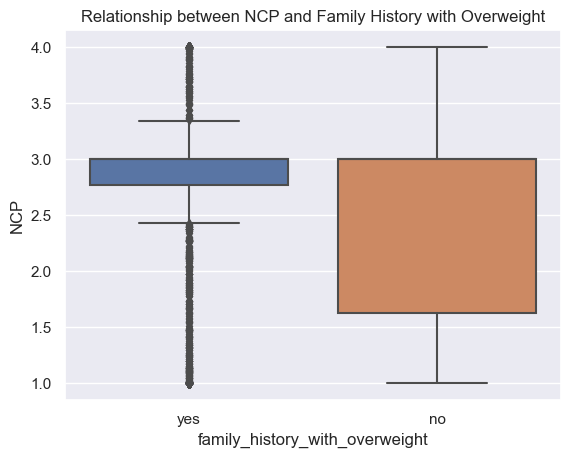

In [378]:
# NCP - Number of main meals
sns.boxplot(data=df, x=RESPONSE_VAR, y='NCP').set_title("Relationship between NCP and Family History with Overweight")

Text(0.5, 1.0, 'Relationship between FAF and Family History with Overweight')

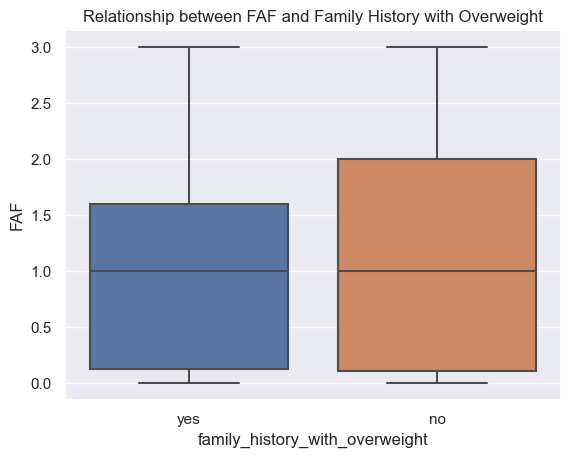

In [379]:
# FAF - Physical activity frequency
sns.boxplot(data=df, x=RESPONSE_VAR, y='FAF').set_title("Relationship between FAF and Family History with Overweight")

Text(0.5, 1.0, 'Relationship between Weight and Family History with Overweight')

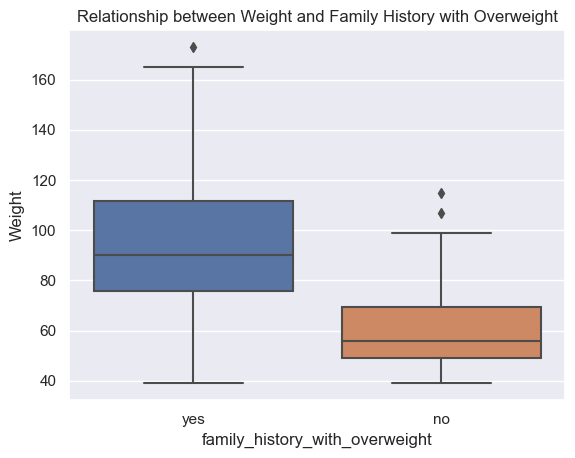

In [380]:
# Weight
sns.boxplot(data=df, x=RESPONSE_VAR, y='Weight').set_title("Relationship between Weight and Family History with Overweight")

----

**Relationships between explanatory variable pairs**

Text(0.5, 1.0, 'Relationship between FAVC and FCVC')

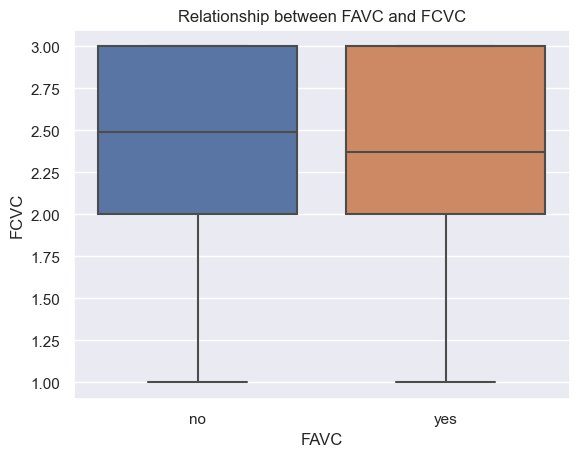

In [381]:
# FAVC (Frequent consumption of high caloric food) vs FCVC (Frequent consumption of vegetables)
sns.boxplot(data=df, x='FAVC', y='FCVC').set_title("Relationship between FAVC and FCVC")

Text(0.5, 1.0, 'Relationship between FAVC and NCP')

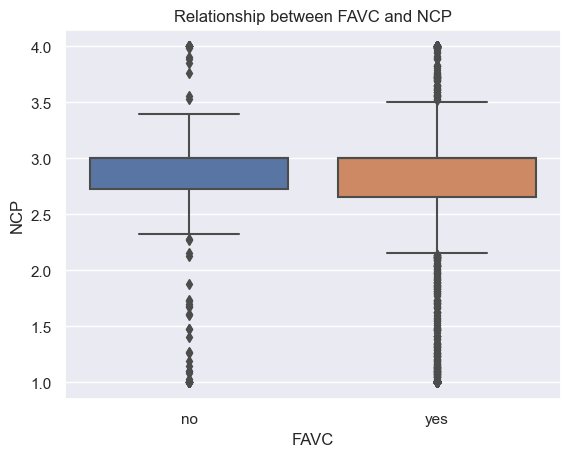

In [382]:
# FAVC (Frequent consumption of high caloric food) vs NCP (Number of main meals)
sns.boxplot(data=df, x='FAVC', y='NCP').set_title("Relationship between FAVC and NCP")

Text(0.5, 1.0, 'Relationship between FAVC and FAF')

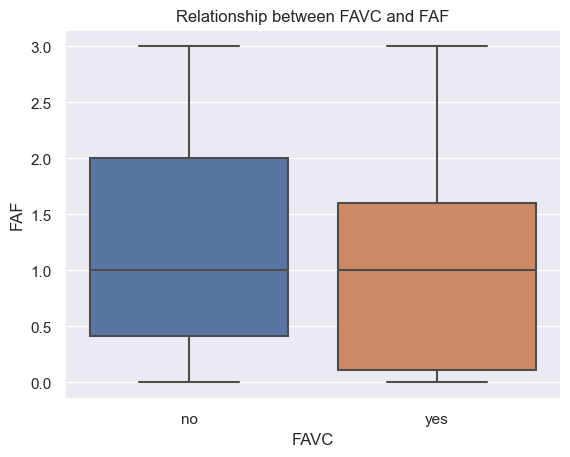

In [383]:
# FAVC (Frequent consumption of high caloric food) vs FAF (Physical activity frequency)
sns.boxplot(data=df, x='FAVC', y='FAF').set_title("Relationship between FAVC and FAF")

Text(0.5, 1.0, 'Relationship between FAVC and Weight')

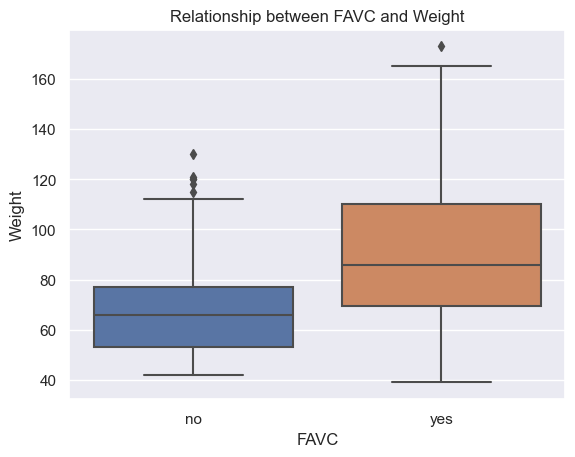

In [384]:
# FAVC (Frequent consumption of high caloric food) vs Weight
sns.boxplot(data=df, x='FAVC', y='Weight').set_title("Relationship between FAVC and Weight")

Text(0.5, 1.0, 'Relationship between FCVC and NCP')

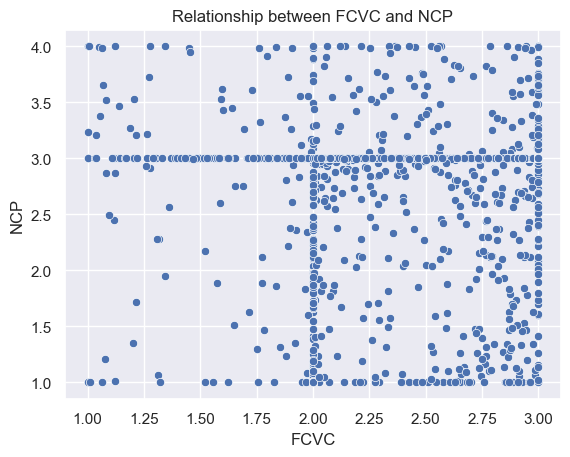

In [385]:
# FCVC (Frequent consumption of vegetables) vs NCP (Number of main meals)
sns.scatterplot(data=df, x='FCVC', y='NCP').set_title("Relationship between FCVC and NCP")

Text(0.5, 1.0, 'Relationship between FCVC and FAF')

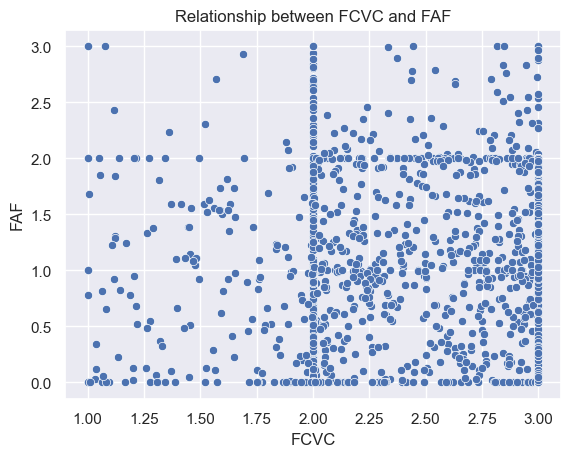

In [386]:
# FCVC (Frequent consumption of vegetables) vs FAF (Physical activity frequency)
sns.scatterplot(data=df, x='FCVC', y='FAF').set_title("Relationship between FCVC and FAF")

Text(0.5, 1.0, 'Relationship between FCVC and Weight')

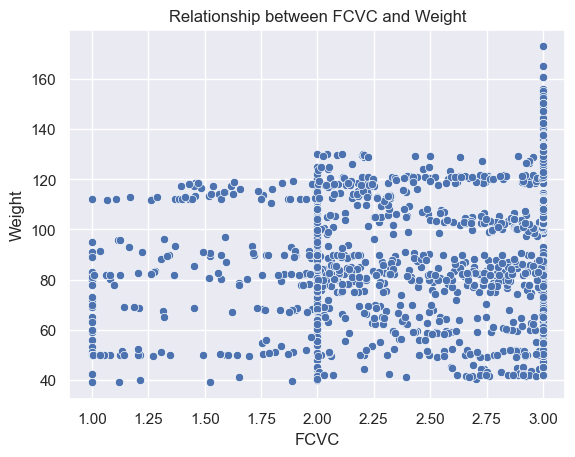

In [387]:
# FCVC (Frequent consumption of vegetables) vs Weight
sns.scatterplot(data=df, x='FCVC', y='Weight').set_title("Relationship between FCVC and Weight")

Text(0.5, 1.0, 'Relationship between NCP and FAF')

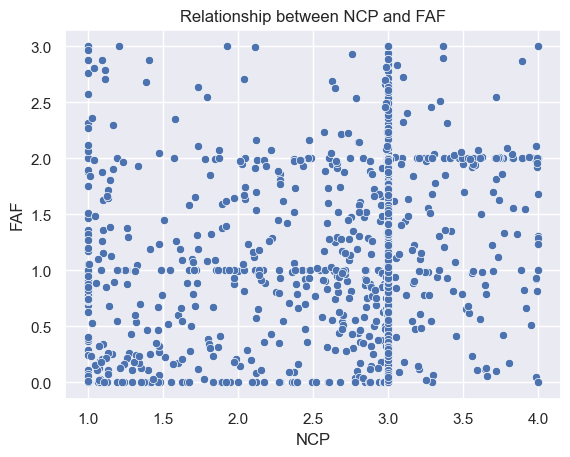

In [388]:
# NCP (Number of main meals) vs FAF (Physical activity frequency)
sns.scatterplot(data=df, x='NCP', y='FAF').set_title("Relationship between NCP and FAF")

Text(0.5, 1.0, 'Relationship between NCP and Weight')

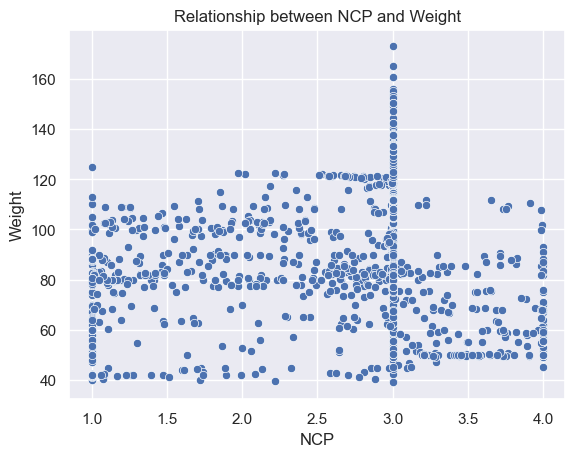

In [389]:
# NCP (Number of main meals) vs Weight
sns.scatterplot(data=df, x='NCP', y='Weight').set_title("Relationship between NCP and Weight")

Text(0.5, 1.0, 'Relationship between FAF and Weight')

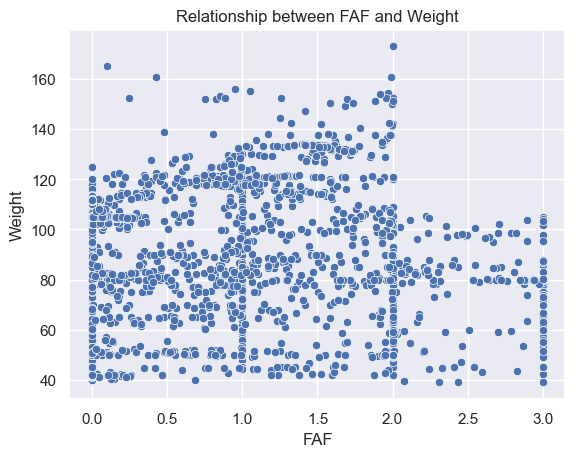

In [390]:
# FAF (Physical activity frequency) vs Weight
sns.scatterplot(data=df, x='FAF', y='Weight').set_title("Relationship between FAF and Weight")

In [391]:
df[NUMERICAL_VARS].corr()

,FCVC,NCP,FAF,Weight
FCVC,1.000000,0.042216,0.019939,0.216125
NCP,0.042216,1.000000,0.129504,0.107469
FAF,0.019939,0.129504,1.000000,-0.051436
Weight,0.216125,0.107469,-0.051436,1.000000


----

**Interaction effects**

In [392]:
# creating 0/1 indicator variables
df[RESPONSE_VAR] = df[RESPONSE_VAR].replace({'yes':1, 'no':0})
df[CATEGORICAL_VAR] = df[CATEGORICAL_VAR].replace({'yes':1, 'no':0})

/var/folders/q7/6dmm5z593pq12lyg1fx31txm0000gn/T/ipykernel_18338/3224307516.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[RESPONSE_VAR] = df[RESPONSE_VAR].replace({'yes':1, 'no':0})
/var/folders/q7/6dmm5z593pq12lyg1fx31txm0000gn/T/ipykernel_18338/3224307516.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[CATEGORICAL_VAR] = df[CATEGORICAL_VAR].replace({'yes':1, 'no':0})


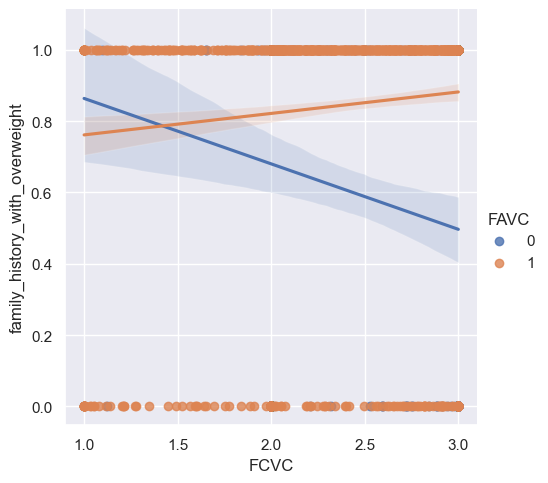

In [393]:
# FAVC (Frequent consumption of high caloric food) vs FCVC (Frequent consumption of vegetables)
sns.lmplot(data=df, hue='FAVC', x='FCVC', y=RESPONSE_VAR)

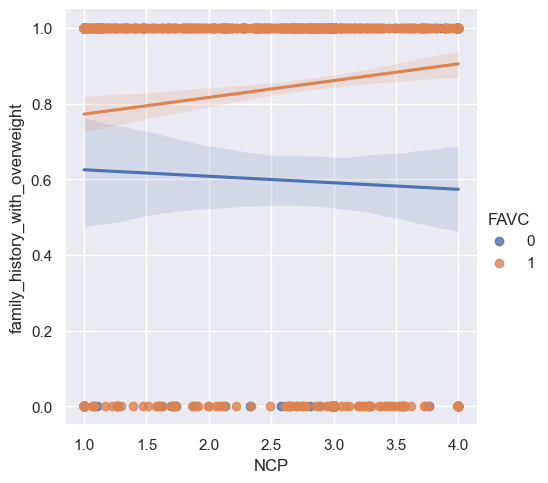

In [394]:
# FAVC (Frequent consumption of high caloric food) vs NCP (Number of main meals)
sns.lmplot(data=df, hue='FAVC', x='NCP', y=RESPONSE_VAR)

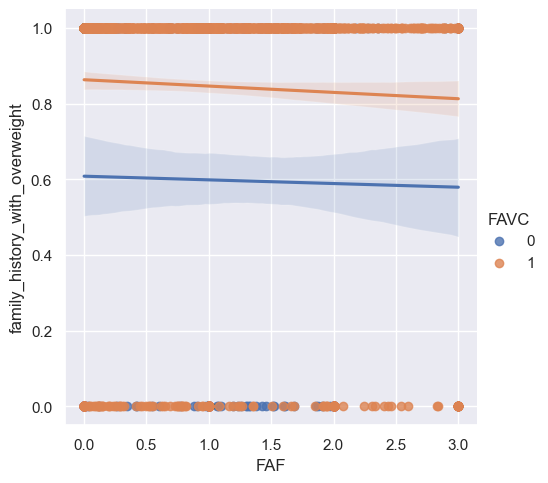

In [395]:
# FAVC (Frequent consumption of high caloric food) vs FAF (Physical activity frequency)
sns.lmplot(data=df, hue='FAVC', x='FAF', y=RESPONSE_VAR)

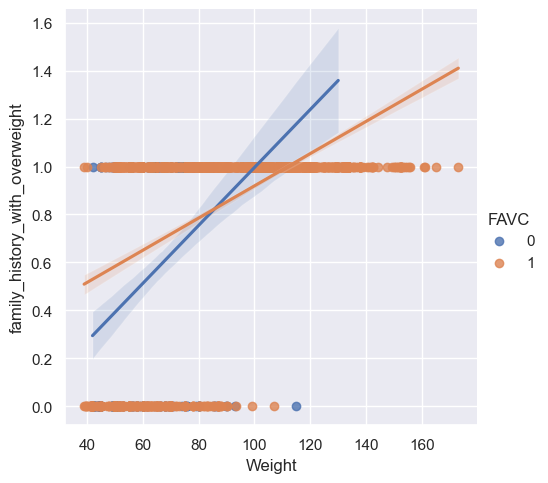

In [396]:
# FAVC (Frequent consumption of high caloric food) vs Weight
sns.lmplot(data=df, hue='FAVC', x='Weight', y=RESPONSE_VAR)

## 5. Model Data Preprocessing

Our 0/1 response variable and indicator variable (FAVC) were created above.

In [397]:
# create features matrix & target array
features_matrix = df.drop(columns=[RESPONSE_VAR])
target_array = df[RESPONSE_VAR]

In [398]:
# explanatory variable scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_vars = scaler.fit_transform(features_matrix[NUMERICAL_VARS])
features_matrix[NUMERICAL_VARS] = scaled_vars
features_matrix

,FAVC,FCVC,NCP,FAF,Weight
0,0,-0.785019,0.404153,-1.188039,-0.862558
1,0,1.088342,0.404153,2.339750,-1.168077
2,0,-0.785019,0.404153,1.163820,-0.366090
3,0,1.088342,0.404153,1.163820,0.015808
4,0,-0.785019,-2.167023,-1.188039,0.122740
...,...,...,...,...,...
2106,1,1.088342,0.404153,0.783135,1.711763
2107,1,1.088342,0.404153,0.389341,1.800914
2108,1,1.088342,0.404153,0.474971,1.798868
2109,1,1.088342,0.404153,0.151471,1.785780


In [399]:
features_matrix.describe()

,FAVC,FCVC,NCP,FAF,Weight
count,2111.000000,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03
mean,0.883941,-1.346362e-17,4.964711e-16,2.692725e-17,-5.385449e-16
std,0.320371,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00
min,0.000000,-2.658379e+00,-2.167023e+00,-1.188039e+00,-1.817304e+00
25%,1.000000,-7.850187e-01,-3.456952e-02,-1.041630e+00,-8.062914e-01
50%,1.000000,-6.283450e-02,4.041527e-01,-1.210937e-02,-1.369510e-01
75%,1.000000,1.088342e+00,4.041527e-01,7.718565e-01,7.960531e-01
max,1.000000,1.088342e+00,1.689740e+00,2.339750e+00,3.300136e+00


## 6. Feature Selection with k-Fold Cross-Validation

The base model had the highest average test AUC.

In [400]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [401]:
# create model
cross_val_model = LogisticRegression()
cross_val = KFold(n_splits=5, shuffle=True, random_state=100)

# base model
base_roc_auc = cross_val_score(cross_val_model, features_matrix, target_array, cv=cross_val, scoring="roc_auc")
print("Base AUC values:", base_roc_auc)
print("Base AUC mean:", base_roc_auc.mean())
print("Base AUC standard deviation", base_roc_auc.std())

Base AUC values: [0.86657224 0.86071781 0.89884508 0.88879196 0.89628766]
Base AUC mean: 0.8822429492602579
Base AUC standard deviation 0.015650413115002183


In [402]:
# Remove FAVC
reduced_features_matrix = features_matrix.drop(columns=['FAVC'])
test_roc_auc = cross_val_score(cross_val_model, reduced_features_matrix, target_array, cv=cross_val, scoring="roc_auc")
print("Test AUC values:", test_roc_auc)
print("Test AUC mean:", test_roc_auc.mean())
print("Test AUC standard deviation", test_roc_auc.std())
print("Better fit than base:", (test_roc_auc.mean() > base_roc_auc.mean()))

Test AUC values: [0.86274788 0.85786489 0.89714348 0.88494932 0.89777618]
Test AUC mean: 0.8800963494032418
Test AUC standard deviation 0.01686380566525295
Better fit than base: False


In [403]:
# Remove FCVC
reduced_features_matrix = features_matrix.drop(columns=['FCVC'])
test_roc_auc = cross_val_score(cross_val_model, reduced_features_matrix, target_array, cv=cross_val, scoring="roc_auc")
print("Test AUC values:", test_roc_auc)
print("Test AUC mean:", test_roc_auc.mean())
print("Test AUC standard deviation", test_roc_auc.std())
print("Better fit than base:", (test_roc_auc.mean() > base_roc_auc.mean()))

Test AUC values: [0.86673412 0.86092913 0.89886318 0.88845962 0.89501435]
Test AUC mean: 0.8820000805717034
Test AUC standard deviation 0.015313363326596009
Better fit than base: False


In [404]:
# Remove NCP
reduced_features_matrix = features_matrix.drop(columns=['NCP'])
test_roc_auc = cross_val_score(cross_val_model, reduced_features_matrix, target_array, cv=cross_val, scoring="roc_auc")
print("Test AUC values:", test_roc_auc)
print("Test AUC mean:", test_roc_auc.mean())
print("Test AUC standard deviation", test_roc_auc.std())
print("Better fit than base:", (test_roc_auc.mean() > base_roc_auc.mean()))

Test AUC values: [0.87264265 0.85908002 0.8948445  0.89030824 0.89110473]
Test AUC mean: 0.8815960312452351
Test AUC standard deviation 0.013630653977152267
Better fit than base: False


In [405]:
# Remove FAF
reduced_features_matrix = features_matrix.drop(columns=['FAF'])
test_roc_auc = cross_val_score(cross_val_model, reduced_features_matrix, target_array, cv=cross_val, scoring="roc_auc")
print("Test AUC values:", test_roc_auc)
print("Test AUC mean:", test_roc_auc.mean())
print("Test AUC standard deviation", test_roc_auc.std())
print("Better fit than base:", (test_roc_auc.mean() > base_roc_auc.mean()))

Test AUC values: [0.86523675 0.86117568 0.89808479 0.88760801 0.89571377]
Test AUC mean: 0.8815638005450348
Test AUC standard deviation 0.015439853152232794
Better fit than base: False


In [406]:
# Remove Weight
reduced_features_matrix = features_matrix.drop(columns=['Weight'])
test_roc_auc = cross_val_score(cross_val_model, reduced_features_matrix, target_array, cv=cross_val, scoring="roc_auc")
print("Test AUC values:", test_roc_auc)
print("Test AUC mean:", test_roc_auc.mean())
print("Test AUC standard deviation", test_roc_auc.std())
print("Better fit than base:", (test_roc_auc.mean() > base_roc_auc.mean()))

Test AUC values: [0.67316876 0.63928219 0.66094638 0.69049103 0.63857604]
Test AUC mean: 0.6604928796445453
Test AUC standard deviation 0.019955016918607033
Better fit than base: False


## 7. Best Model Discussion

Our best model for this data set is the base model inclusive of all the explanatory variables. This cross validation gave us the best AUC mean average at 0.8822429492602579.

**Train-test-split and model fitting**

In [407]:
# train-test split
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.2, random_state=100)

# scaling training and test datasets
scaler2 = StandardScaler()
scaled_train = scaler2.fit_transform(df_train[NUMERICAL_VARS])
df_train[NUMERICAL_VARS] = scaled_train
scaled_test = scaler2.transform(df_test[NUMERICAL_VARS])
df_test[NUMERICAL_VARS] = scaled_test


In [408]:
# create model
import statsmodels.formula.api as smf

formula = RESPONSE_VAR + '~' + '+'.join(NUMERICAL_VARS + [CATEGORICAL_VAR])
print("Formula: ", formula)
log_mod = smf.logit(formula=formula, data=df_train).fit()
log_mod.summary()

Formula:  family_history_with_overweight~FCVC+NCP+FAF+Weight+FAVC
Optimization terminated successfully.
         Current function value: 0.306692
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Logit Regression Results                                 
==========================================================================================
Dep. Variable:     family_history_with_overweight   No. Observations:                 1688
Model:                                      Logit   Df Residuals:                     1682
Method:                                       MLE   Df Model:                            5
Date:                            Tue, 05 Dec 2023   Pseudo R-squ.:                  0.3627
Time:                                    23:52:52   Log-Likelihood:                -517.70
converged:                                   True   LL-Null:                       -812.39
Covariance Type:                        nonrobust   LLR p-value:                3.981e-125
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4063      0.220     10.923      0.000       1.975       2.838
FCVC           0.0057      0.077      0.074      0.941      -0.145       0.156
NCP            0.2690      0.068      3.939      0.000       0.135       0.403
FAF           -0.0681      0.076     -0.901      0.368      -0.216       0.080
Weight         2.3774      0.147     16.174      0.000       2.089       2.666
FAVC           0.4361      0.198      2.204      0.028       0.048       0.824
==============================================================================
"""

The equation of the best logistic regression equation is:

$\hat{p}=\frac{1}{1+\exp(2.4063 + 0.0057 \times \text{FCVC} + 0.2690 \times \text{NCP} - 0.0681 \times \text{FAF} + 2.3774 \times \text{Weight} + 0.4361 \times \text {FAVC})}$

**Multicollinearity**

None of the explanatory variables in this model exhibit an issus with multicollinearity, as the correlation coefficients are all low with none above 0.7.

In [409]:
df_train.corr()

,family_history_with_overweight,FAVC,FCVC,NCP,FAF,Weight
family_history_with_overweight,1.000000,0.201965,0.041544,0.090365,-0.047610,0.503921
FAVC,0.201965,1.000000,-0.033491,0.003025,-0.106704,0.268657
FCVC,0.041544,-0.033491,1.000000,0.044433,0.017521,0.223637
NCP,0.090365,0.003025,0.044433,1.000000,0.141279,0.095805
FAF,-0.047610,-0.106704,0.017521,0.141279,1.000000,-0.049964
Weight,0.503921,0.268657,0.223637,0.095805,-0.049964,1.000000


**Overfitting explanatory variables**

Since our best model was also the one with all original variables, none of the original explanatory variables were indicated to be overfitting the model. Our slopes also show that all variables have predictive power as none were assigned a slope around 0.

**Slope interpretations**

We are able to interpret the magnitudes of the slopes as indicating how important the corresponding explanatory variable is as all variables have been normalized and have standard deviation ~1 with the exception of the indicator variable FAVC, which has values 0/1.

The slopes tell us that Weight and FAVC (Frequent consumption of high caloric food) are the most important variables as they have the greatest slope 
magnitudes.

**Test ROC and AUC**

The AUC of this ROC curve is 0.867, which is quite close to 1 and relatively high. This suggests that this model would do relatively well at classifying the observations in this dataset in general.

In [410]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

predictions = log_mod.predict(df_test)
df_test['predictive_prob'] = predictions

fprs, tprs, thresholds = roc_curve(y_true=df_test[RESPONSE_VAR], y_score=df_test['predictive_prob'])

auc = roc_auc_score(y_true=df_test[RESPONSE_VAR], y_score=df_test['predictive_prob'])
print("AUC:", auc)

AUC: 0.8666127074059085


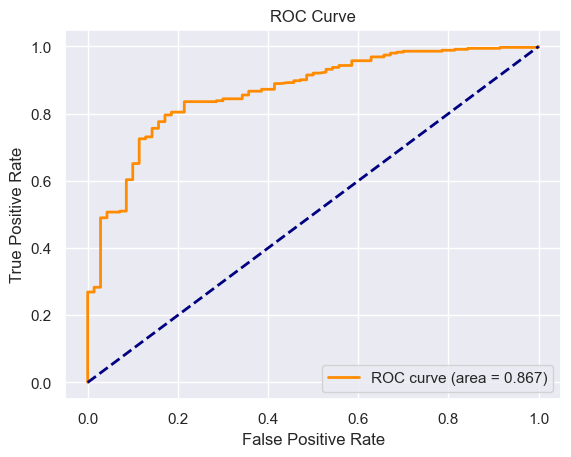

In [411]:
plt.plot(fprs, tprs, color='darkorange', lw=2, label='ROC curve (area = ' + str(round(auc, 3)) +')')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.plot([0.25, 0.25], [1, 0], color='grey', lw=2, linestyle='dotted')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

**Best predictive probability threshold**

We narrowed down 2 thresholds that could best meet the research goals of the people we described at the beginning by finding a balance between the true and false positive rate. After testing the accuracy of both, we found that the second candidate threshold, 0.75, best meets our research goal. 

For this threshold, the FPR is 0.214286 and the TPR is 0.835694. In the context of our research analysis, this means that 21.4% of individuals who don't actually have a family history with obesity and 83.6% of individuals who do have a family history with obesity with be predicted to have one.

In [412]:
from sklearn.metrics import confusion_matrix

def fpr_tpr_thresh(y, pred_prob, thresh):
    yhat = 1*(pred_prob >= thresh)
    tn, fp, fn, tp = confusion_matrix(y_true=y, y_pred=yhat).ravel()
    tpr = tp / (fn + tp)
    fpr = fp / (fp + tn)
    return [thresh, fpr, tpr]

In [413]:
import numpy as np

threshs, fprs, tprs = [], [], []
for thresh in np.arange(0,1.01,.01):
    retvals = fpr_tpr_thresh(df_test[RESPONSE_VAR], predictions, thresh)
    threshs.append(retvals[0])
    fprs.append(retvals[1])
    tprs.append(retvals[2])
df_thresholds = pd.DataFrame({'thresh':threshs, 'fpr':fprs, 'tpr':tprs}, index = np.arange(0, len(threshs)))
df_thresholds

,thresh,fpr,tpr
0,0.00,1.000000,1.000000
1,0.01,1.000000,1.000000
2,0.02,1.000000,1.000000
3,0.03,1.000000,1.000000
4,0.04,1.000000,1.000000
...,...,...,...
96,0.96,0.042857,0.507082
97,0.97,0.028571,0.473088
98,0.98,0.028571,0.402266
99,0.99,0.028571,0.339943


In [414]:
# point 1: FPR ~0.1, TPR ~0.5
thresh1 = df_thresholds[(df_thresholds.fpr > 0.05) & (df_thresholds.fpr < 0.15) & (df_thresholds.tpr > 0.45) & (df_thresholds.tpr < 0.55)]['thresh'][95]

# point 2: FPR ~0.2, TPR ~0.85
thresh2 = df_thresholds[(df_thresholds.fpr > 0.2) & (df_thresholds.fpr < 0.25) & (df_thresholds.tpr > 0.8) & (df_thresholds.tpr < 0.9)]['thresh'][75]

# find better threshold
for threshold in [thresh1, thresh2]:
    tn, fp, fn, tp = confusion_matrix(y_true=df_test[RESPONSE_VAR], y_pred=(1*(predictions >= threshold))).ravel()
    accuracy = (tp + tn) / (tp + fp + fn + tn)
    print("Threshold: " + str(threshold) + ", Accuracy: " + str(accuracy))

Threshold: 0.9500000000000001, Accuracy: 0.5862884160756501
Threshold: 0.75, Accuracy: 0.8274231678486997


In [415]:
df_thresholds[df_thresholds['thresh'] == 0.75]

,thresh,fpr,tpr
75,0.75,0.214286,0.835694


## 8. Additional Analysis/Insight

We tested a few extra analyses for insight that could advance our research goals by looking at gender, SCC (calories consumption monitoring), and CALC (consumption of alcohol) using visualizations and descriptive statistics. 

We found that gender and SCC both had some relationship with our response variable, especially SCC, as the ratios of family history to no family history of overweight were quite different between individuals who did and didn't monitor calorie consumption, although not in the expected direction. 

This advances our main research goal of building a model that performs well when predicting family history with overweight as considering different variables could improve outcomes. The results of our analysis suggest that these variables could be considered for a future model to improve predictions. However, it is unclear how much predictive power they will bring or what the nature of their relationships with family history of obesity are.

In [416]:
original_df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


**Is there a relationship between gender and family history of overweight?**

Text(0.5, 1.0, 'Family History with Overweight by Gender')

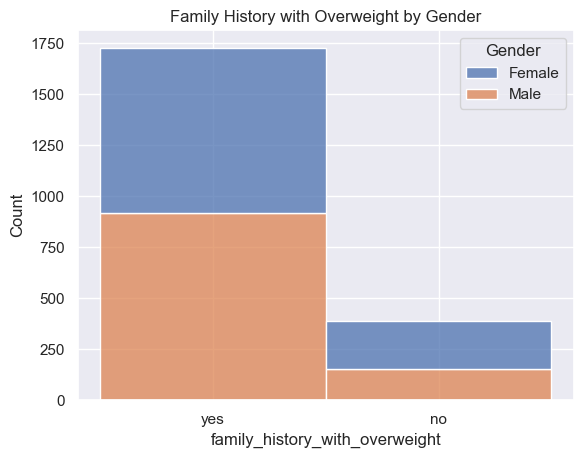

In [417]:
sns.histplot(data=original_df, x=RESPONSE_VAR, hue='Gender', stat="count", multiple="stack").set_title("Family History with Overweight by Gender")

In [418]:
f_history, m_history = original_df[original_df[RESPONSE_VAR] == 'yes'].groupby('Gender').agg('count')['Age']
f_no_history, m_no_history = original_df[original_df[RESPONSE_VAR] == 'no'].groupby('Gender').agg('count')['Age']
print("Ratio of family history with overweight vs no family history with overweight:\nFemale: " + str(f_history/f_no_history) + " to 1\nMale: " + str(m_history/m_no_history) + " to 1")

Ratio of family history with overweight vs no family history with overweight:
Female: 3.4956896551724137 to 1
Male: 5.980392156862745 to 1


**Is there a relationship between SCC (calories consumption monitoring) and family history of overweight?**

Text(0.5, 1.0, 'Family History with Overweight by SCC')

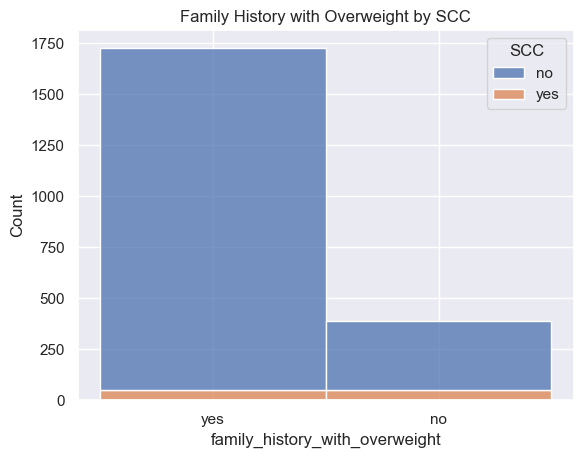

In [419]:
sns.histplot(data=original_df, x=RESPONSE_VAR, hue='SCC', stat="count", multiple="stack").set_title("Family History with Overweight by SCC")

In [420]:
scc_history, no_scc_history = original_df[original_df[RESPONSE_VAR] == 'yes'].groupby('SCC').agg('count')['Age']
scc_no_history, no_scc_no_history = original_df[original_df[RESPONSE_VAR] == 'no'].groupby('SCC').agg('count')['Age']
print("Ratio of family history with overweight vs no family history with overweight:\nSCC: " + str(scc_history/scc_no_history) + " to 1\nNo SCC: " + str(no_scc_history/no_scc_no_history) + " to 1")

Ratio of family history with overweight vs no family history with overweight:
SCC: 4.997023809523809 to 1
No SCC: 0.9591836734693877 to 1


**Is there a relationship between CALC (consumption of alcohol) and family history of overweight?**

Text(0.5, 1.0, 'Family History with Overweight by CALC')

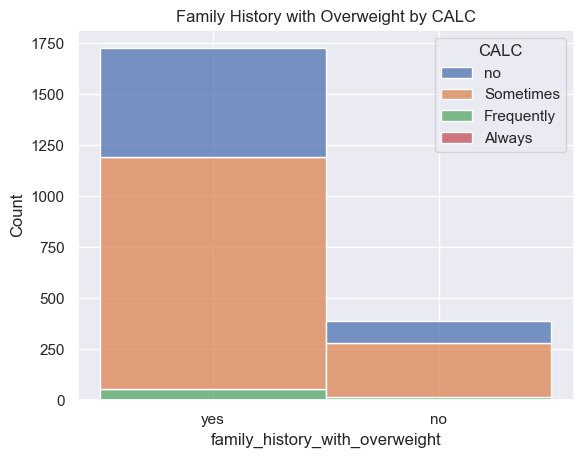

In [426]:
sns.histplot(data=original_df, x=RESPONSE_VAR, hue='CALC', stat="count", multiple="stack").set_title("Family History with Overweight by CALC")

## 9. Conclusion

Looking over the analysis of our data research and visualization, we created a model that is strong and can be utilized by doctors, medical professionals, etc. in order to effectively predict if a person has a family with obesity. The average AUC from our model was just north of 0.886. We found that there were no ineffective explanatory variables in terms of their predicitve power, and visualized these relationships and used backwards cross validation to come up with our best fit model. We would recommend our best model to be used, but not without some improvements in dataset size, consideration of a different model type, and potentially the inclusion of more/different variables.

Our model is not guaranteed to have the highest possible averate test AUC - there may have been a version of our model with a higher AUC potentially utilizing the variables with a minimal interaction to our response variable. While this would have created issues of potential multicollinearity and overfitting, we could have found a stronger model utilizing different feature selection techniques that could have yieled a higher average test AUC as part of a more complete analysis. Some of the different techniques we could have used are Lasso regression modeling, or Elastic net modeling incorporating more variables and this would have been more efficient when dealing with more variables. We could also have removed outliers to reduce result skewing by extreme values when predicting based on new data points.

In the future, we could try a different model type as mentioned above and try different combinations of starting variables for the analysis outside of the 5 we chose for this project.

The equation of the best logistic regression equation is:

$\hat{p}=\frac{1}{1+\exp(2.4063 + 0.0057 \times \text{FCVC} + 0.2690 \times \text{NCP} - 0.0681 \times \text{FAF} + 2.3774 \times \text{Weight} + 0.4361 \times \text {FAVC})}$

## References

Mayo Clinic. (2023, July 22). Obesity - Symptoms and causes - Mayo Clinic. Retrieved December 5, 2023, from https://www.mayoclinic.org/diseases-conditions/obesity/symptoms-causes/syc-20375742 

WHO. (2020, February 21). Obesity. Retrieved December 5, 2023, from https://www.who.int/health-topics/obesity#tab=tab_1